In [16]:
from pickle import load
from numpy import mean
from numpy import std
import numpy as np
from matplotlib import pyplot as plt

In [2]:
results = load(open('../results_bigger_run.pkl', 'rb'))
print('%d models evaluated' % len(results))
rearranged_results = {}
for model_name, scores in results.items():
    rearranged_results[model_name] = {}
    for metric_dict in scores:
        for metric, value in metric_dict.items():
            if metric not in rearranged_results[model_name]:
                rearranged_results[model_name][metric] = []
            rearranged_results[model_name][metric].append(value)
results = rearranged_results

19 models evaluated


In [3]:
results

{'baseline': {'weighted_accuracy': [0.17743967825272836,
   0.17727151493251175,
   0.17656444683262432,
   0.17698915698554343,
   0.17746249955026053],
  'weighted_f1_score': [0.053480173974014465,
   0.053386478153714986,
   0.05299327881143345,
   0.053229312274519276,
   0.05349289469287583],
  'confusion_matrix': [array([[     0,  31389,      0, ...,      0,      0,      0],
          [     0, 226860,      0, ...,      0,      0,      0],
          [     0,  16887,      0, ...,      0,      0,      0],
          ...,
          [     0,  12275,      0, ...,      0,      0,      0],
          [     0,    397,      0, ...,      0,      0,      0],
          [     0,    405,      0, ...,      0,      0,      0]]),
   array([[     0,  31518,      0, ...,      0,      0,      0],
          [     0, 226645,      0, ...,      0,      0,      0],
          [     0,  16814,      0, ...,      0,      0,      0],
          ...,
          [     0,  12523,      0, ...,      0,      0,      0],

In [4]:
metrics = ['weighted_accuracy', 'weighted_f1_score']
for model_name, scores in results.items():
    print(model_name)
    for metric in metrics:
        print(f"Mean {metric}: {mean(scores[metric], axis=0)*100:.1f}")
        print(f"Std {metric}: {std(scores[metric])*100:.1f}")

baseline
Mean weighted_accuracy: 17.7
Std weighted_accuracy: 0.0
Mean weighted_f1_score: 5.3
Std weighted_f1_score: 0.0
one_gram
Mean weighted_accuracy: 26.9
Std weighted_accuracy: 0.0
Mean weighted_f1_score: 22.2
Std weighted_f1_score: 0.0
four_gram
Mean weighted_accuracy: 49.1
Std weighted_accuracy: 0.0
Mean weighted_f1_score: 48.7
Std weighted_f1_score: 0.0
random_forest300GiniLog2
Mean weighted_accuracy: 50.5
Std weighted_accuracy: 0.0
Mean weighted_f1_score: 49.5
Std weighted_f1_score: 0.0
random_forest300EntropySqrt
Mean weighted_accuracy: 50.5
Std weighted_accuracy: 0.0
Mean weighted_f1_score: 49.4
Std weighted_f1_score: 0.0
random_forest100GiniSqrt
Mean weighted_accuracy: 50.4
Std weighted_accuracy: 0.0
Mean weighted_f1_score: 49.3
Std weighted_f1_score: 0.0
random_forest100GiniLog2
Mean weighted_accuracy: 50.3
Std weighted_accuracy: 0.0
Mean weighted_f1_score: 49.3
Std weighted_f1_score: 0.0
random_forest100GiniLog2Balanced
Mean weighted_accuracy: 40.0
Std weighted_accuracy: 0

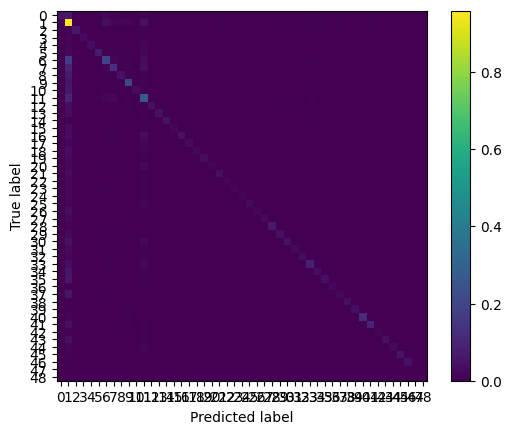

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=results["random_forest300GiniLog2"]["confusion_matrix"][0] / np.max(results["four_gram"]["confusion_matrix"][0]))
disp.plot(include_values=False)
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()